In [4]:
import os
import time
import math
import pandas as pd
import numpy as np
import sqlalchemy
import psycopg2
import sys
print(pd.__version__)

pd.set_option('max_columns', None)

from postgressql import *

1.3.4


In [2]:
conn_params_dic = {
    "host": "10.0.0.102",
    "dbname": "mastr",
    "user": "uba_user",
    "password": "UBAit2021!",
    "port": "5432"
}

sqlpath = "./sqlCommands/loadMastrDBfiles.sql"

def format_bytes(size):
    # 2**10 = 1024
    power = 2**10
    n = 0
    power_labels = {0 : '', 1: 'kilo', 2: 'mega', 3: 'giga', 4: 'tera'}
    while size > power:
        size /= power
        n += 1
    return size, power_labels[n]+'bytes'

def build_postgres_conn_string (param:dict) -> str:
    """

    """
    return f'postgresql+psycopg2://{param["user"]}:{param["password"]}@{param["host"]}:{param["port"]}/{param["dbname"]}'

def create_postgres_engine (param:dict):
    """
    
    """
    conString = build_postgres_conn_string(param)
    engine = sqlalchemy.create_engine(conString, pool_recycle=3600)
    return engine

def read_postgres_from_queryfile (sqlpath:str, postgresLogin:dict):# -> pandas.core.frame.DataFrame:
    """

    """
    engine = create_postgres_engine(postgresLogin)
    
    scriptFile = open(sqlpath,'r')
    script = scriptFile.read()
    df = pd.read_sql(script, engine)

    return df

# Read from MaStR Postgres DB

In [5]:
sqlpath = "./sqlCommands/loadMastrDBfiles.sql"
df = read_postgres_from_queryfile(sqlpath, conn_params_dic)
#df = df.dropna()
df['SpezifischeLeistung'] = (df.Nettonennleistung * 1000) / ((math.pi * df.Rotordurchmesser**2) / 4)
df.head(n=30)#.filter(regex="grad(?i)").head()
#df.to_excel()

,EinheitMastrNummer,DatumLetzteAktualisierung,LokationMaStRNummer,NetzbetreiberpruefungStatus,NetzbetreiberpruefungDatum,AnlagenbetreiberMastrNummer,Land,Bundesland,Landkreis,Gemeinde,Gemeindeschluessel,Postleitzahl,Gemarkung,FlurFlurstuecknummern,StrasseNichtGefunden,Hausnummer_nv,HausnummerNichtGefunden,Ort,Laengengrad,Breitengrad,Registrierungsdatum,Inbetriebnahmedatum,EinheitSystemstatus,EinheitBetriebsstatus,NichtVorhandenInMigriertenEinheiten,DatumDesBetreiberwechsels,DatumRegistrierungDesBetreiberwechsels,NameStromerzeugungseinheit,Weic_nv,Kraftwerksnummer_nv,Energietraeger,Bruttoleistung,Nettonennleistung,AnschlussAnHoechstOderHochSpannung,FernsteuerbarkeitNb,FernsteuerbarkeitDv,FernsteuerbarkeitDr,Einspeisungsart,GenMastrNummer,Lage,Hersteller,Technologie,Typenbezeichnung,Nabenhoehe,Rotordurchmesser,Rotorblattenteisungssystem,AuflageAbschaltungLeistungsbegrenzung,EegMaStRNummer,AuflagenAbschaltungSchallimmissionsschutzNachts,AuflagenAbschaltungSchallimmissionsschutzTagsueber,AuflagenAbschaltungSchattenwurf,AuflagenAbschaltungTierschutz,AuflagenAbschaltungEiswurf,AuflagenAbschaltungSonstige,Weic,WeicDisplayName,Seelage,ClusterNordsee,Wassertiefe,Kuestenentfernung,GeplantesInbetriebnahmedatum,Strasse,Hausnummer,Adresszusatz,DatumEndgueltigeStilllegung,ClusterOstsee,DatumBeginnVoruebergehendeStilllegung,Kraftwerksnummer,DatumWiederaufnahmeBetrieb,geo_point,SpezifischeLeistung
0,SEE958001513183,2021-05-05 09:22:21.596793,SEL920583220919,0,2021-05-05,ABR935633938560,84,1408.0,Friesland,Zetel,3455027.0,26340.0,None,None,NaN,NaN,NaN,Zetel,NaN,NaN,2019-11-06,2019-10-17,472,35,0,NaT,NaT,Windkraft,0,0,2497,10.00,10.00,NaN,0.0,NaN,NaN,689.0,None,888,2554.0,691,EAZ Zwölf,15.00,12.00,NaN,0.0,EEG998266234591,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaT,None,None,None,NaT,NaN,NaT,None,NaT,None,88.419413
1,SEE960477419715,2021-09-28 07:21:26.662457,None,1,2021-09-28,None,84,1403.0,Donau-Ries,Donauwörth,9779131.0,86609.0,None,None,NaN,NaN,NaN,Donauwörth,NaN,NaN,2021-09-28,2012-11-14,472,38,0,NaT,NaT,WKA,0,0,2497,0.53,0.53,NaN,0.0,NaN,NaN,689.0,None,888,2554.0,691,FlowerW,6.20,1.00,0.0,0.0,EEG922209688622,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaT,None,None,None,2021-09-17,NaN,NaT,None,NaT,None,674.816959
2,SEE900863856724,2021-03-04 19:52:14.075273,SEL945468574505,1,2021-08-23,ABR915532452978,84,1411.0,Dithmarschen,Krempel,1051061.0,25774.0,None,None,NaN,NaN,NaN,Krempel,NaN,NaN,2021-03-04,2011-03-30,472,35,0,NaT,NaT,"Windkraft oben 7,5",0,0,2497,7.50,7.50,NaN,0.0,NaN,NaN,689.0,None,888,1639.0,691,"S+W 7,5",22.86,5.50,0.0,0.0,EEG966330549476,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaT,None,None,None,NaT,NaN,NaT,None,NaT,None,315.679226
3,SEE905039792912,2021-02-02 16:15:11.639829,SEL934736857594,1,2021-02-02,ABR947060374606,84,1403.0,Traunstein,Fridolfing,9189118.0,83413.0,None,None,NaN,NaN,NaN,Fridolfing,NaN,NaN,2021-01-30,2015-06-12,472,35,0,NaT,NaT,Windrad,0,0,2497,29.80,29.80,NaN,0.0,NaN,NaN,689.0,None,888,1615.0,691,LA 30,42.00,14.00,0.0,0.0,EEG991592499757,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaT,None,None,None,NaT,NaN,NaT,None,NaT,None,193.584380
4,SEE961412780822,2020-11-16 18:13:09.856844,SEL919016386957,0,2020-11-16,ABR949879762292,84,1403.0,Dachau,Altomünster,9174111.0,85250.0,None,None,NaN,NaN,NaN,Altomünster,NaN,NaN,2020-11-11,2016-04-13,472,35,0,NaT,NaT,Windrad,0,0,2497,10.00,10.00,NaN,0.0,NaN,NaN,689.0,None,888,1634.0,691,EN-Drive2000.3MXP,12.00,8.00,0.0,0.0,EEG983287085208,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaT,None,None,None,NaT,NaN,NaT,None,NaT,None,198.943679
5,SEE966669104971,2020-07-23 10:23:53.831084,SEL954844761279,1,2020-08-17,ABR932016828548,84,1403.0,Unterallgäu,Stetten,9778199.0,87778.0,None,None,NaN,NaN,NaN,Stetten,NaN,NaN,2020-05-24,2015-07-27,472,35,0,NaT,NaT,Windrad,1,0,2497,5.50,5.50,0.0,0.0,0.0,0.0,688.0,None,888,1624.0,691,5.5kW,16.20,6.00,0.0,0.0,EEG926353069832,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaT,None,None,None,NaT,NaN,NaT,No

In [6]:
print(f"Size: {format_bytes(sys.getsizeof(df))}")
print(f"Size: {format_bytes(df.memory_usage(index=True, deep=True).sum())}")

df.count()

Size: (45.89513111114502, 'megabytes')
Size: (45.89511585235596, 'megabytes')


EinheitMastrNummer                       32729
DatumLetzteAktualisierung                32729
LokationMaStRNummer                      30713
NetzbetreiberpruefungStatus              32729
NetzbetreiberpruefungDatum               31016
                                         ...  
DatumBeginnVoruebergehendeStilllegung       30
Kraftwerksnummer                             1
DatumWiederaufnahmeBetrieb                   3
geo_point                                31989
SpezifischeLeistung                      32330
Length: 71, dtype: int64

In [7]:
len(df.columns)

71

# PLOTTING SPACIAL DATA

In [8]:
import geopandas as gp
import matplotlib.pyplot as plt
import plotly.express as px
import math

/opt/anaconda/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:644: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


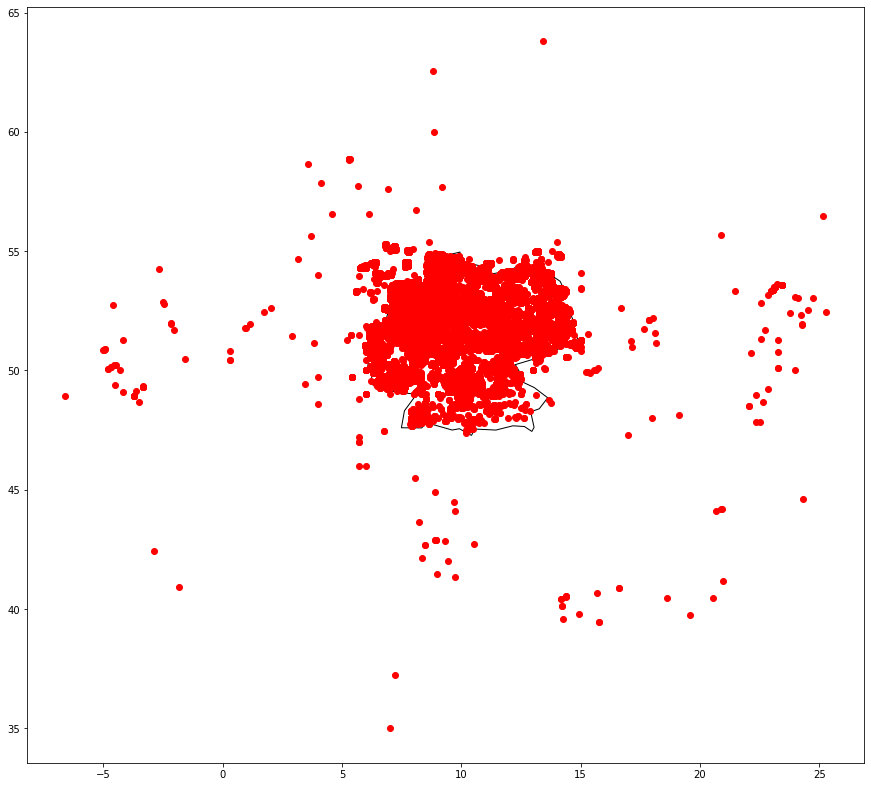

In [9]:
dfna = df.dropna(subset=['Laengengrad','Breitengrad'])
gdf = gp.GeoDataFrame(dfna, geometry=gp.points_from_xy(dfna.Laengengrad, dfna.Breitengrad))
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

# We restrict to Germany.
ax = world[world.name == 'Germany'].plot(
    color='white', edgecolor='black', figsize=(15,15))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, 
    color='red',
    column='Nettonennleistung')

plt.show()

In [10]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [11]:
px.colors.named_colorscales()

['aggrnyl',
 'agsunset',
 'blackbody',
 'bluered',
 'blues',
 'blugrn',
 'bluyl',
 'brwnyl',
 'bugn',
 'bupu',
 'burg',
 'burgyl',
 'cividis',
 'darkmint',
 'electric',
 'emrld',
 'gnbu',
 'greens',
 'greys',
 'hot',
 'inferno',
 'jet',
 'magenta',
 'magma',
 'mint',
 'orrd',
 'oranges',
 'oryel',
 'peach',
 'pinkyl',
 'plasma',
 'plotly3',
 'pubu',
 'pubugn',
 'purd',
 'purp',
 'purples',
 'purpor',
 'rainbow',
 'rdbu',
 'rdpu',
 'redor',
 'reds',
 'sunset',
 'sunsetdark',
 'teal',
 'tealgrn',
 'turbo',
 'viridis',
 'ylgn',
 'ylgnbu',
 'ylorbr',
 'ylorrd',
 'algae',
 'amp',
 'deep',
 'dense',
 'gray',
 'haline',
 'ice',
 'matter',
 'solar',
 'speed',
 'tempo',
 'thermal',
 'turbid',
 'armyrose',
 'brbg',
 'earth',
 'fall',
 'geyser',
 'prgn',
 'piyg',
 'picnic',
 'portland',
 'puor',
 'rdgy',
 'rdylbu',
 'rdylgn',
 'spectral',
 'tealrose',
 'temps',
 'tropic',
 'balance',
 'curl',
 'delta',
 'oxy',
 'edge',
 'hsv',
 'icefire',
 'phase',
 'twilight',
 'mrybm',
 'mygbm']

In [12]:
start = '2013-12-15'
end = '2016-08-15'

test = dfna[(dfna["Inbetriebnahmedatum"] >= start) & (dfna["Inbetriebnahmedatum"] < end) & (dfna["Nettonennleistung"] < 6000)]

fig = px.scatter_mapbox(test, 
            lat='Breitengrad', 
            lon='Laengengrad', 
            #animation_frame = 'Inbetriebnahmedatum',
            color="SpezifischeLeistung", #"Nettonennleistung",
            #size="Nettonennleistung",
            hover_name="EegMaStRNummer", 
            hover_data=["Inbetriebnahmedatum","Hersteller",'Typenbezeichnung', "Nettonennleistung"],
            #color_discrete_sequence=px.colors.sequential.Rainbow, #px.colors.qualitative.Antique,
            color_continuous_scale="jet", 
            zoom=6, 
            height=1200,
            mapbox_style="open-street-map")
fig.show()